LINK: https://colab.research.google.com/drive/1Ze06OIQrFnRRyPAFju894YF4r0ysL7JE?usp=sharing

## **Predicting Cardiovascular Disease from Lifestyle Behaviors**

### **Project Report Team B08**

Contributors:  Zixiao Jiao,  Junyi Liu,  Hanchao Tang,  Zixuan Zhu

## **I.Problem Statement & Motivation**

Cardiovascular disease (CVD) is one of the main reasons of death worldwide, but many cases can be avoided through better lifestyle choices and early prevention.Our project uses machine learning to predict the likelihood of CVD based only on demographic and lifestyle data such as age, gender, smoking, drinking, and physical activity.We want to see how far simple data can go in identifying high-risk individuals—without using any medical or lab test information. This helps us understand whether behavioral data alone can provide enough insight for prevention programs, especially in places with limited resources.

### **II.Data source**

The dataset used in our project consists of the 2015 BRFSS wave, which contains over 300,000 observations and several hundred variables. Because BRFSS relies on self-reported data, responses may include non-responses, skip patterns, or coded values such as “Don’t know” or “Refused.” To ensure data quality and analytical feasibility, we selected a subset of variables most relevant to cardiovascular disease prediction—covering demographics, lifestyle behaviors, chronic conditions, and access to care—and removed variables with excessive missingness or irrelevant clinical content. We also applied random sampling to reduce the dataset to 100,000 records for computational efficiency while preserving the overall structure and representativeness of the population.

The original BRFSS 2015 dataset can be accessed via Kaggle at:

* https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system/data?select=2015.csv

## **III.Data Cleaning & Preparation**

### **3.1 Data Loading & Reduction Strategy**

In this project, the original BRFSS 2015 dataset contains more than 300,000 records. To improve computational efficiency and make model training more manageable, we applied random sampling to reduce the dataset to 100,000 rows. Random sampling preserves the overall distribution of the population and ensures that the reduced dataset remains representative, while significantly reducing processing time for data cleaning, feature engineering, and machine learning.

In [ ]:
!pip install kagglehub --quiet

import kagglehub
import pandas as pd

path = kagglehub.dataset_download("cdc/behavioral-risk-factor-surveillance-system")
print("Downloaded to:", path)
df = pd.read_csv(path + "/2015.csv")

Using Colab cache for faster access to the 'behavioral-risk-factor-surveillance-system' dataset.
Downloaded to: /kaggle/input/behavioral-risk-factor-surveillance-system


Beyond reducing the dataset size, we also examined the structure and quality of the selected features. The BRFSS data contains a large number of categorical variables encoded as numeric values, as well as several variables with substantial missingness. To ensure data usability, we carefully selected variables relevant to cardiovascular disease prediction and excluded fields with excessive missing values or irrelevant medical/lab-test information.

### **3.2 BRFSS Column Description**

| Column title | Description |
|--------------|-------------|
| `_AGEG5YR` | 5-year age group category. |
| `SEX` | Biological sex of the respondent (1 = Male, 2 = Female). |
| `EDUCA` | Education level of the respondent. |
| `INCOME2` | Household income category. |
| `MARITAL` | Marital status. |
| `EMPLOY1` | Employment status. |
| `GENHLTH` | Self-rated general health status. |
| `PHYSHLTH` | Number of days physical health was not good in the past 30 days. |
| `MENTHLTH` | Number of days mental health was not good in the past 30 days. |
| `POORHLTH` | Days poor health limited usual activities in the past 30 days. |
| `_TOTINDA` | Whether respondent meets recommended physical activity levels. |
| `ADSLEEP` | Number of hours of sleep per day. |
| `SMOKE100` | Has smoked at least 100 cigarettes in lifetime. |
| `SMOKDAY2` | Current smoking frequency (daily / some days / not at all). |
| `ALCDAYS` | Number of drinking days in the past 30 days. |
| `FRUIT1` | Fruit consumption frequency in the past 30 days. |
| `VEGETAB1` | Vegetable consumption frequency in the past 30 days. |
| `DIABETE3` | Whether respondent has diabetes (including pre-diabetes categories). |
| `BPHIGH4` | Whether respondent has been told they have high blood pressure. |
| `BLOODCHO` | Whether respondent has had a blood cholesterol check. |
| `CHCKIDNY` | Whether respondent has kidney disease. |
| `CVDCRHD4` | Whether respondent has coronary heart disease. |
| `CVDSTRK3` | Whether respondent has had a stroke. |
| `HLTHPLN1` | Whether respondent has any form of health insurance coverage. |

In [ ]:
correct_cols = [
    "_AGEG5YR",
    "SEX",
    "EDUCA",
    "INCOME2",
    "MARITAL",
    "EMPLOY1",

    "GENHLTH",
    "PHYSHLTH",
    "MENTHLTH",
    "POORHLTH",

    "_TOTINDA",
    "ADSLEEP",
    "SMOKE100",
    "_SMOKER3",

    "ALCDAY5",
    "FRUIT1",
    "VEGETAB1",

    "DIABETE3",

    "BPHIGH4",
    "BLOODCHO",

    "CHCKIDNY",
    "CVDCRHD4",
    "CVDSTRK3",

    "HLTHPLN1",
    "PERSDOC2",
    "MEDCOST",
    "CHECKUP1",
    "CHOLCHK"
]

In this part of the project, we selected from the original BRFSS 2015 dataset only the variables most relevant to our research focus—covering demographic factors, lifestyle behaviors, chronic conditions, and healthcare access. These fields were consolidated into a correct_cols list to form the basis of our working dataset.

Because our target is heart disease, we must draw random samples only from records that actually report heart disease status (codes 1 or 2). Observations with “don’t know,” “refused,” or missing values cannot be used as targets and are excluded before sampling.

In [ ]:
# 1. Keep only rows where chronic health condition variable is 1 or 2
df_valid = df[df["CVDCRHD4"].isin([1, 2])]

# 2. Keep only the columns you want
df_reduced = df_valid[correct_cols]

# 3. Sample and reset index
df_small = df_reduced.sample(n=100000, random_state=42)
df_small = df_small.reset_index(drop=True)

# Convert CVDCRHD4 into binary 0/1
df_small['CVDCRHD4'] = df_small['CVDCRHD4'].map({1: 1, 2: 0})

df_small.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _AGEG5YR  100000 non-null  float64
 1   SEX       100000 non-null  float64
 2   EDUCA     100000 non-null  float64
 3   INCOME2   99204 non-null   float64
 4   MARITAL   100000 non-null  float64
 5   EMPLOY1   100000 non-null  float64
 6   GENHLTH   99999 non-null   float64
 7   PHYSHLTH  100000 non-null  float64
 8   MENTHLTH  100000 non-null  float64
 9   POORHLTH  51278 non-null   float64
 10  _TOTINDA  100000 non-null  float64
 11  ADSLEEP   4600 non-null    float64
 12  SMOKE100  96778 non-null   float64
 13  _SMOKER3  100000 non-null  float64
 14  ALCDAY5   96402 non-null   float64
 15  FRUIT1    93358 non-null   float64
 16  VEGETAB1  92503 non-null   float64
 17  DIABETE3  99999 non-null   float64
 18  BPHIGH4   99999 non-null   float64
 19  BLOODCHO  100000 non-null  float64
 20  CHCKI

Overall, this section established a clean and workable foundation for our analysis. After reducing the dataset to a manageable size and selecting only the variables relevant to cardiovascular risk, we inspected the structure of each feature and identified key issues such as missingness, inconsistent coding, and potential noise in self-reported values. These steps ensure that the dataset entering the cleaning and preprocessing pipeline is both representative and aligned with the goals of our prediction task. In the next section, we address these quality issues through systematic imputation, encoding, and transformation procedures to prepare the data for modeling.

### **3.3 Data Cleaning**

Several variables still have missing values.
Before modeling, we must examine which columns contain missing values and choose appropriate strategies for handling them.



In [ ]:
# Count missing values for each column
df_small.isnull().sum()


,0
_AGEG5YR,0
SEX,0
EDUCA,0
INCOME2,796
MARITAL,0
EMPLOY1,0
GENHLTH,1
PHYSHLTH,0
MENTHLTH,0
POORHLTH,48722


Some columns have small amounts missing (e.g., INCOME2), while others have more substantial missingness (e.g., ADSLEEP, SMOKDAY2).

To understand the missing rows more clearly, let’s inspect an example column, to show the subset of records where sleep hours were not reported.



### **3.4 Dropping Variables**
Since some of the columns have more than 50% of missing data, that is, "Not Asked or Missing" during the BRFSS health survey. We decides to drop these columns knowing that some other variables already includes the same/similar information.

In [ ]:
df_small = df_small.drop(columns=[
    "POORHLTH", "ADSLEEP"
])

### **3.5 Bar Chart for MENTHLTH Distribution**

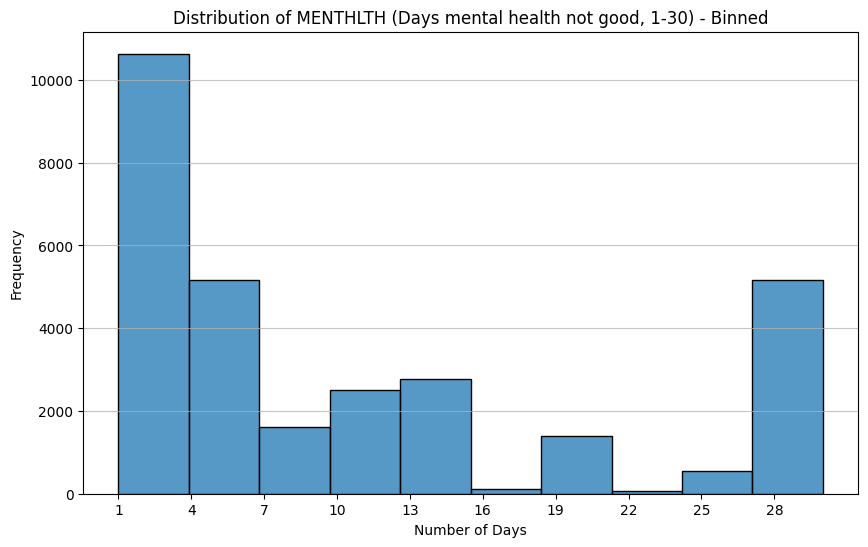

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter MENTHLTH for values between 1 and 30
menth_filtered = df_small[(df_small['MENTHLTH'] >= 1) & (df_small['MENTHLTH'] <= 30)]['MENTHLTH']

# Create a bar chart (histogram) for the filtered MENTHLTH values
plt.figure(figsize=(10, 6))
sns.histplot(menth_filtered, bins=10, kde=False) # bins=10 is an example, can be adjusted
plt.title('Distribution of MENTHLTH (Days mental health not good, 1-30) - Binned')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.xticks(range(1, 31, 3)) # Adjust x-ticks for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

### **3.6 Bar Chart for FRUIT1 Distribution (Encoded Frequencies)**

This chart shows the distribution of the encoded frequency values for `FRUIT1`, excluding special codes for 'Don't know', 'Refused', and 'Never'. Refer to the BRFSS codebook for the meaning of each numerical code.

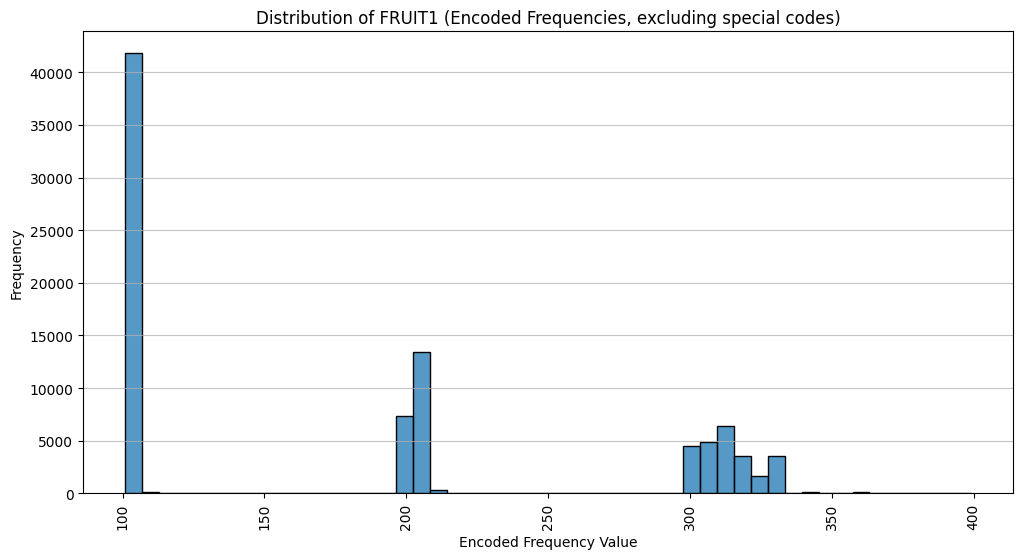

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define special codes to exclude for FRUIT1
special_codes = [555., 777., 999.]

# Filter FRUIT1 for values not in special_codes
fruit1_filtered = df_small[~df_small['FRUIT1'].isin(special_codes)]['FRUIT1']

# Create histogram for the filtered FRUIT1 values
plt.figure(figsize=(12, 6))
sns.histplot(fruit1_filtered, bins=50, kde=False) # Adjust bins as needed
plt.title('Distribution of FRUIT1 (Encoded Frequencies, excluding special codes)')
plt.xlabel('Encoded Frequency Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=90)
plt.show()

### **3.7 Bar Chart for VEGETAB1 Distribution (Encoded Frequencies)**

This chart shows the distribution of the encoded frequency values for `VEGETAB1`, excluding special codes for 'Don't know', 'Refused', and 'Never'. Refer to the BRFSS codebook for the meaning of each numerical code.

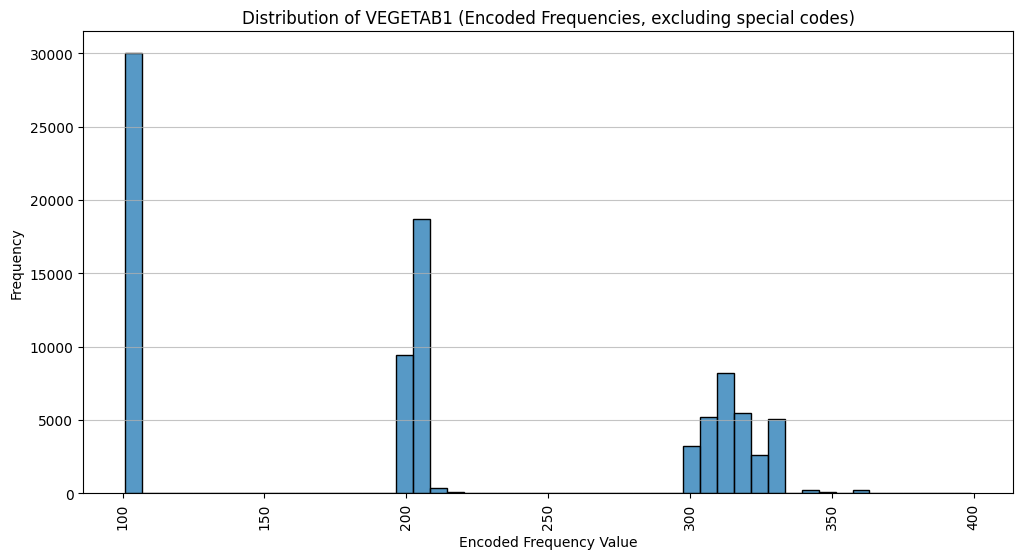

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define special codes to exclude for VEGETAB1
special_codes = [555., 777., 999.]

# Filter VEGETAB1 for values not in special_codes
vegetab1_filtered = df_small[~df_small['VEGETAB1'].isin(special_codes)]['VEGETAB1']

# Create histogram for the filtered VEGETAB1 values
plt.figure(figsize=(12, 6))
sns.histplot(vegetab1_filtered, bins=50, kde=False) # Adjust bins
plt.title('Distribution of VEGETAB1 (Encoded Frequencies, excluding special codes)')
plt.xlabel('Encoded Frequency Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=90)
plt.show()

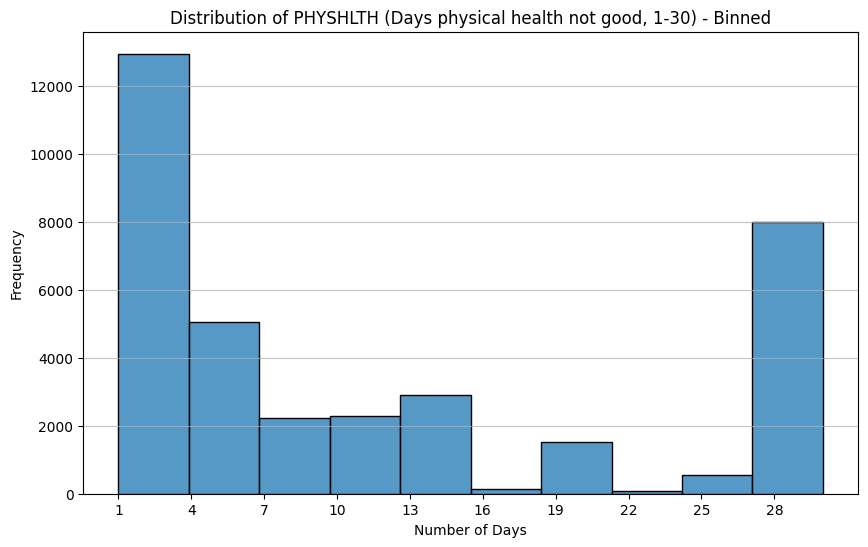

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter PHYSHLTH for values between 1 and 30
ph_filtered = df_small[(df_small['PHYSHLTH'] >= 1) & (df_small['PHYSHLTH'] <= 30)]['PHYSHLTH']

# Create a bar chart (histogram) for the filtered PHYSHLTH values
plt.figure(figsize=(10, 6))
sns.histplot(ph_filtered, bins=10, kde=False) # bins=10 is an example, can be adjusted
plt.title('Distribution of PHYSHLTH (Days physical health not good, 1-30) - Binned')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.xticks(range(1, 31, 3)) # Adjust x-ticks for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

### **3.8 Converting Categorial Variable**
Why We Transform Certain Variables

Some variables are stored as numbers but represent categories (e.g., 1=Yes, 2=No, 7/9=Don’t know). Others mix real numeric values with special numeric codes (e.g., 1–30 days vs. 77/99 for invalid responses). To avoid misleading the model, we transform each type separately: categorical-coded numbers are recoded and treated as categories, while mixed numeric variables have special codes mapped to meaningful values or NaN. This ensures all variables reflect their true meaning before modeling.


Below we transfrom the feature using these the underlying standards as well as the comprehension of the codebook from the BFRSS dataset and the distribution of the features

In [ ]:
import numpy as np

# Define the conditions and choices for ALCDAY5 transformation
conditions_alcday5 = [
    (df_small['ALCDAY5'] >= 1) & (df_small['ALCDAY5'] <= 231),
    (df_small['ALCDAY5'] == 888),
    (df_small['ALCDAY5'] == 777),
    (df_small['ALCDAY5'] == 999)
]
choices_alcday5 = [1, 2, 7, 9]

# Apply the transformation using np.select
df_small['ALCDAY5'] = np.select(conditions_alcday5, choices_alcday5, default=df_small['ALCDAY5'])

# Define conditions for PHYSHLTH transformation
conditions_physhlth = [
    (df_small['PHYSHLTH'] >= 1) & (df_small['PHYSHLTH'] <= 2),    # 0–2 days
    (df_small['PHYSHLTH'] >= 3) & (df_small['PHYSHLTH'] <= 13),   # 3–13 days
    (df_small['PHYSHLTH'] >= 14) & (df_small['PHYSHLTH'] <= 30),  # 14–30 days
    (df_small['PHYSHLTH'] == 77),                                 # Don’t know
    (df_small['PHYSHLTH'] == 88),                                 # None
    (df_small['PHYSHLTH'] == 99)                                  # Refused
]

# Corresponding output values
choices_physhlth = [1, 2, 3, 77, 88, 99]

# Apply transformation for PHYSHLTH
df_small['PHYSHLTH'] = np.select(
    conditions_physhlth,
    choices_physhlth,
    default=df_small['PHYSHLTH']   # preserves any other values unchanged
)

# Define conditions for MENTHLTH transformation, similar to PHYSHLTH
conditions_menthlth = [
    (df_small['MENTHLTH'] >= 1) & (df_small['MENTHLTH'] <= 2),    # 0–2 days
    (df_small['MENTHLTH'] >= 3) & (df_small['MENTHLTH'] <= 13),   # 3–13 days
    (df_small['MENTHLTH'] >= 14) & (df_small['MENTHLTH'] <= 30),  # 14–30 days
    (df_small['MENTHLTH'] == 77),                                 # Don’t know
    (df_small['MENTHLTH'] == 88),                                 # None
    (df_small['MENTHLTH'] == 99)                                  # Refused
]

# Corresponding output values
choices_menthlth = [1, 2, 3, 77, 88, 99]

# Apply transformation for MENTHLTH
df_small['MENTHLTH'] = np.select(
    conditions_menthlth,
    choices_menthlth,
    default=df_small['MENTHLTH']   # preserves any other values unchanged
)


# Define conditions for FRUIT1 transformation
conditions_fruit1 = [
    (df_small['FRUIT1'] >= 101) & (df_small['FRUIT1'] <= 199),  # Daily
    (df_small['FRUIT1'] >= 201) & (df_small['FRUIT1'] <= 299),  # Weekly
    ((df_small['FRUIT1'] == 300) |
     ((df_small['FRUIT1'] >= 301) & (df_small['FRUIT1'] <= 399)) | # Times per month
     (df_small['FRUIT1'] == 555)),                                # Never
    (df_small['FRUIT1'] == 777),                                # Don't know
    (df_small['FRUIT1'] == 999)                                 # Refused
]

choices_fruit1 = [1, 2, 3, 777, 999]

df_small['FRUIT1'] = np.select(
    conditions_fruit1,
    choices_fruit1,
    default=df_small['FRUIT1']   # preserve other codes
)

# Define conditions for VEGETAB1 transformation
conditions_vegetab1 = [
    (df_small['VEGETAB1'] >= 101) & (df_small['VEGETAB1'] <= 199),  # Daily
    (df_small['VEGETAB1'] >= 201) & (df_small['VEGETAB1'] <= 299),  # Weekly
    ((df_small['VEGETAB1'] == 300) |
     ((df_small['VEGETAB1'] >= 301) & (df_small['VEGETAB1'] <= 399)) | # Times per month
     (df_small['VEGETAB1'] == 555)),                                # Never
    (df_small['VEGETAB1'] == 777),                                # Don't know
    (df_small['VEGETAB1'] == 999)                                 # Refused
]

choices_vegetab1 = [1, 2, 3, 777, 999]

df_small['VEGETAB1'] = np.select(
    conditions_vegetab1,
    choices_vegetab1,
    default=df_small['VEGETAB1']   # preserve other codes
)

In [ ]:
unique_values = {col: df_small[col].unique() for col in df_small.columns}
unique_values


{'_AGEG5YR': array([ 9.,  4., 13.,  8.,  1., 12., 11.,  7.,  5., 10.,  2.,  6.,  3.,
        14.]),
 'SEX': array([1., 2.]),
 'EDUCA': array([6., 4., 2., 5., 3., 9., 1.]),
 'INCOME2': array([ 8.,  7., 99., 77.,  3.,  5.,  4.,  1.,  6.,  2., nan]),
 'MARITAL': array([1., 3., 6., 5., 2., 9., 4.]),
 'EMPLOY1': array([2., 1., 7., 8., 5., 6., 3., 4., 9.]),
 'GENHLTH': array([ 3.,  5.,  4.,  1.,  2.,  9.,  7., nan]),
 'PHYSHLTH': array([ 2., 88.,  3., 99.,  1., 77.]),
 'MENTHLTH': array([ 2.,  3., 88., 77.,  1., 99.]),
 '_TOTINDA': array([1., 9., 2.]),
 'SMOKE100': array([ 2.,  1., nan,  7.,  9.]),
 '_SMOKER3': array([4., 1., 3., 9., 2.]),
 'ALCDAY5': array([ 1.,  2., nan,  9.,  7.]),
 'FRUIT1': array([  3.,   1., 777.,   2.,  nan, 999.]),
 'VEGETAB1': array([  3.,   2.,   1.,  nan, 777., 999.]),
 'DIABETE3': array([ 3.,  1.,  4.,  2.,  7.,  9., nan]),
 'BPHIGH4': array([ 4.,  1.,  3.,  2.,  9.,  7., nan]),
 'BLOODCHO': array([1., 2., 7., 9.]),
 'CHCKIDNY': array([2., 1., 9., 7.]),
 'CVDCRHD

## **3.9 Strategies for Handling Missing Values**

Because dropping rows would reduce our data size dramatically, and these variables are important for health-behavior modeling, we will replace missing values using imputation.

## **3.10 Imputations for null values**

Since all of the variables are transformed into categorical variables. We'll impute the null values and turn them into the corresponding values in the original dataset that represent "Don't Know/Not Sure"

In [ ]:
df_small['INCOME2'] = df_small['INCOME2'].fillna(77)
df_small['SMOKE100'] = df_small['SMOKE100'].fillna(7)
df_small['ALCDAY5'] = df_small['ALCDAY5'].fillna(777)
df_small['FRUIT1'] = df_small['FRUIT1'].fillna(777)
df_small['VEGETAB1'] = df_small['VEGETAB1'].fillna(777)
df_small['DIABETE3'] = df_small['DIABETE3'].fillna(7)
df_small['CHOLCHK'] = df_small['CHOLCHK'].fillna(7)
df_small['GENHLTH'] = df_small['GENHLTH'].fillna(7)
df_small['PHYSHLTH'] = df_small['PHYSHLTH'].fillna(77)
df_small['BPHIGH4'] = df_small['BPHIGH4'].fillna(7)
df_small['MEDCOST'] = df_small['MEDCOST'].fillna(7)
df_small['CHECKUP1'] = df_small['CHECKUP1'].fillna(7)

In [ ]:
# Count missing values for each column after transformations
df_small.isnull().sum()

,0
_AGEG5YR,0
SEX,0
EDUCA,0
INCOME2,0
MARITAL,0
EMPLOY1,0
GENHLTH,0
PHYSHLTH,0
MENTHLTH,0
_TOTINDA,0


### **3.11 Feature Selection**
Before modeling, we want to examine the correlation between each variables and the target variable in order to understand the logic and predicting effect between them. After that, we'll drop certain variables that does not contribute to the prediction.

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

target = 'CVDCRHD4'

chi_sq_results = {}

for col in df_small.columns:

    # Skip the target itself
    if col == target:
        continue

    # Build contingency table
    contingency = pd.crosstab(df_small[col], df_small[target])

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency)

    chi_sq_results[col] = p   # Store the p-value

# Convert to sorted Series
chi_sq_series = pd.Series(chi_sq_results).sort_values(ascending=True)

display(chi_sq_series)


,0
_AGEG5YR,0.000000e+00
PHYSHLTH,0.000000e+00
GENHLTH,0.000000e+00
EMPLOY1,0.000000e+00
DIABETE3,0.000000e+00
CVDSTRK3,0.000000e+00
CHCKIDNY,0.000000e+00
BPHIGH4,0.000000e+00
CHOLCHK,1.260587e-291
_SMOKER3,7.891348e-210


### **3.12 Factors that are indicators of heart disease**
Below are a number of variables that potential reflects one's medical history and the probability of having heart disease, while these indicators does not reflect any risk factors, life styles and demographics.
We will compare and contrast how models' performance change with and without these features to understand the real relationships between lifestyles and heart disease.

In [ ]:
health_related = [
    "CVDSTRK3",     # stroke
    "BPHIGH4",      # high blood pressure
    "BLOODCHO",     # high cholesterol
    "CHCKIDNY",     # chronic kidney disease
    "DIABETE3",     # diabetes
    "CHOLCHK"       # cholesterol test history
]

health_related_less = [
    "CHECKUP1",     # last checkup
    "MEDCOST",      # cost barrier to medical care
    "HLTHPLN1"      # insurance
]

# Store originals here
df_small_original = df_small.copy()
df_small_strong_dropped = None
df_small_all_dropped = None


### **3.13 Preprocessing Pipeline for Categorical Variable**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cat_cols = df_small.columns.tolist()
cat_cols.remove('CVDCRHD4')

categorical_pipeline = Pipeline([
    ("onehot", OneHotEncoder(drop="first",handle_unknown="ignore"))
])

preprocess_pipeline = ColumnTransformer(
    transformers=[
        ("cat", categorical_pipeline, cat_cols)
    ],
    remainder="drop"
)

def build_preprocess_pipeline(df):
    cat_cols = df.columns.tolist()
    cat_cols = [c for c in cat_cols if c != "CVDCRHD4"]  # remove target
    cat_cols = [c for c in cat_cols if c in df.columns]  # ensure existence

    categorical_pipeline = Pipeline([
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
    ])

    return ColumnTransformer(
        transformers=[
            ("cat", categorical_pipeline, cat_cols)
        ],
        remainder="drop"
    )


In [ ]:
from sklearn import set_config

# Enable diagram display for scikit-learn estimators
set_config(display='diagram')

# Display the preprocess_pipeline
preprocess_pipeline

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['_AGEG5YR', 'SEX', 'EDUCA', 'INCOME2',
                                  'MARITAL', 'EMPLOY1', 'GENHLTH', 'PHYSHLTH',
                                  'MENTHLTH', '_TOTINDA', 'SMOKE100',
                                  '_SMOKER3', 'ALCDAY5', 'FRUIT1', 'VEGETAB1',
                                  'DIABETE3', 'BPHIGH4', 'BLOODCHO', 'CHCKIDNY',
                                  'CVDSTRK3', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST',
                                  'CHECKUP1', 'CHOLCHK'])])

In this step, we constructed transformation pipelines to prepare BRFSS features for modeling.
We applied a custom Winsorizer to reduce the influence of extreme coded values and used StandardScaler to standardize all numeric variables.
These preprocessing steps stabilize the optimization process for linear models and improve performance of distance-based models such as KNN.
The transformation pipelines also ensure reproducibility and are seamlessly integrated into our downstream machine-learning workflow.

### **3.14 Functions to vary dataset between all factors and risk-related factors.**

In [ ]:
def switch_df_small(version="original"):
    """
    Switch df_small between:
    - original
    - strong_dropped (only strong leakage removed)
    - all_dropped (strong + weak)

    version options:
        "original"
        "strong"
        "all"
    """
    global df_small, df_small_original, df_small_strong_dropped, df_small_all_dropped

    # Lists from our definitions
    health_related = [
        "CVDSTRK3",
        "BPHIGH4",
        "BLOODCHO",
        "CHCKIDNY",
        "DIABETE3",
        "CHOLCHK"
    ]

    health_related_less = [
        "CHECKUP1",
        "MEDCOST",
        "HLTHPLN1"
    ]

    # Build versions if they weren’t created yet
    if df_small_strong_dropped is None:
        df_small_strong_dropped = df_small_original.drop(columns=health_related, errors="ignore")

    if df_small_all_dropped is None:
        cols = health_related + health_related_less
        df_small_all_dropped = df_small_original.drop(columns=cols, errors="ignore")

    # Now switch df_small
    if version == "original":
        df_small = df_small_original.copy()
    elif version == "strong":
        df_small = df_small_strong_dropped.copy()
    elif version == "all":
        df_small = df_small_all_dropped.copy()
    else:
        raise ValueError("version must be 'original', 'strong', or 'all'")

    print(f"df_small switched to version: {version}")


### **3.15 Switching to risks features before modeling**

In [ ]:
# Switching to risks features
switch_df_small("all")
cat_cols = df_small.columns.tolist()
cat_cols.remove('CVDCRHD4')
preprocess_pipeline = build_preprocess_pipeline(df_small)


# Print to see if we have the right datasets and features
df_small.info()
print(cat_cols)

df_small switched to version: all
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _AGEG5YR  100000 non-null  float64
 1   SEX       100000 non-null  float64
 2   EDUCA     100000 non-null  float64
 3   INCOME2   100000 non-null  float64
 4   MARITAL   100000 non-null  float64
 5   EMPLOY1   100000 non-null  float64
 6   GENHLTH   100000 non-null  float64
 7   PHYSHLTH  100000 non-null  float64
 8   MENTHLTH  100000 non-null  float64
 9   _TOTINDA  100000 non-null  float64
 10  SMOKE100  100000 non-null  float64
 11  _SMOKER3  100000 non-null  float64
 12  ALCDAY5   100000 non-null  float64
 13  FRUIT1    100000 non-null  float64
 14  VEGETAB1  100000 non-null  float64
 15  CVDCRHD4  100000 non-null  int64  
 16  PERSDOC2  100000 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 13.0 MB
['_AGEG5YR', 'SEX', 'EDUCA', 'INCOME2', 'MAR

### **3.16 Train Test Split**
We will perfrom train test spliting using 80/20 rules.

In [ ]:
from sklearn.model_selection import train_test_split

# separate X from y
X = df_small.drop("CVDCRHD4", axis=1)
y = df_small["CVDCRHD4"]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 16), (20000, 16), (80000,), (20000,))

## **IV. Modeling**

### **4.1 Logistic Regression**

We will begin our machine learning modeling by fitting and testing using logistic classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

lr_pipe = make_pipeline(preprocess_pipeline, LogisticRegression(max_iter=1000))
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['_AGEG5YR', 'SEX', 'EDUCA',
                                                   'INCOME2', 'MARITAL',
                                                   'EMPLOY1', 'GENHLTH',
                                                   'PHYSHLTH', 'MENTHLTH',
                                                   '_TOTINDA', 'SMOKE100',
                                                   '_SMOKER3', 'ALCDAY5',
                                                   'FRUIT1', 'VEGETAB1',
                                                   'PERSDOC2'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Accuracy: 0.942
Balanced accuracy: 0.506
              precision    recall  f1-score   support

           0      0.943     0.999     0.970     18847
           1      0.519     0.012     0.024      1153

    accuracy                          0.942     20000
   macro avg      0.731     0.506     0.497     20000
weighted avg      0.919     0.942     0.916     20000



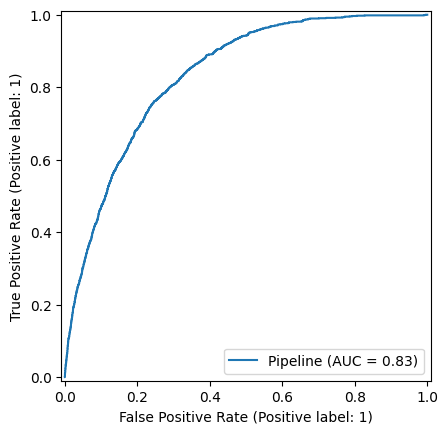

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

y_pred = lr_pipe.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.3f}')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr_pipe, X_test, y_test);

In [ ]:
import pandas as pd

# 1. Get the trained logistic regression model
log_reg = lr_pipe.named_steps["logisticregression"]

# 2. Get the feature names after preprocessing (OneHotEncoder etc.)
ct = lr_pipe.named_steps["columntransformer"]
feature_names = ct.get_feature_names_out()

# 3. Build a table of coefficients
coef = log_reg.coef_[0]          # for binary logistic regression
intercept = log_reg.intercept_[0]

coef_table = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coef
}).sort_values("coefficient", ascending=False)

display(coef_table)
print("Intercept:", intercept)


,feature,coefficient
46,cat__GENHLTH_5.0,2.176130
45,cat__GENHLTH_4.0,1.803552
11,cat___AGEG5YR_13.0,1.745880
10,cat___AGEG5YR_12.0,1.664760
47,cat__GENHLTH_7.0,1.652580
...,...,...
2,cat___AGEG5YR_4.0,-0.676030
0,cat___AGEG5YR_2.0,-0.738136
14,cat__EDUCA_2.0,-0.742582
63,cat__SMOKE100_9.0,-0.759304


Intercept: -4.474706996508807


In [ ]:
coef_df = coef_table.copy()

# 1. Remove the transformer prefix
coef_df["clean_name"] = coef_df["feature"].str.replace("cat__", "", regex=False)

# 2. Extract original feature name: everything before the LAST "_"
coef_df["orig_feature"] = coef_df["clean_name"].str.rsplit("_", n=1).str[0]

# 3. Group by original feature and compute max absolute coefficient
importance_method_A = (
    coef_df.groupby("orig_feature")["coefficient"]
           .apply(lambda x: x.abs().max())
           .sort_values(ascending=False)
)

print("\n=== Method A: Max |coefficient| per original feature ===\n")
display(importance_method_A)



=== Method A: Max |coefficient| per original feature ===



,coefficient
orig_feature,
GENHLTH,2.176130
_AGEG5YR,1.745880
SMOKE100,0.759304
EDUCA,0.742582
EMPLOY1,0.726495
SEX,0.671692
ALCDAY5,0.565724
PERSDOC2,0.469723
MARITAL,0.295900


### **4.1.1 Hyperparameter Tuning and Scoring method**
We perform hyperparameter tuning using randomized search to improve the model’s generalization, handle class imbalance, and optimize predictive performance for heart-disease classification. By adjusting key settings such as regularization strength (C), penalty type (L1/L2), class weight balancing, solver choice, and maximum iterations, we identify the logistic-regression configuration that maximizes recall, F1-score, and ROC-AUC.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

# 1. Base pipeline: preprocessing + logistic regression
lr_base = make_pipeline(
    preprocess_pipeline,
    LogisticRegression(
        solver="liblinear",      # supports both L1 and L2
        max_iter=1000
    )
)

# 2. Hyperparameter distributions
param_distributions = {
    # Regularization strength, sampled log-uniformly
    "logisticregression__C": loguniform(1e-3, 1e2),

    # Penalty type
    "logisticregression__penalty": ["l1", "l2"],

    # Class weights for imbalance
    "logisticregression__class_weight": [None, "balanced"],

    # Allow a bit of variation in max_iter
    "logisticregression__max_iter": randint(300, 1000)
}

# 3. Randomized search
rand_search = RandomizedSearchCV(
    estimator=lr_base,
    param_distributions=param_distributions,
    n_iter=30,                 # number of random combinations to try
    scoring="recall",
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 4. Fit on training data
rand_search.fit(X_train, y_train)

print("Best score:", rand_search.best_score_)
print("Best params:", rand_search.best_params_)

# 5. Best model (pipeline) to use for evaluation
best_lr_pipe = rand_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best score: 0.78953304905032
Best params: {'logisticregression__C': np.float64(49.29053648241677), 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 491, 'logisticregression__penalty': 'l2'}


In [ ]:
import pandas as pd

# Extract full CV results
results = pd.DataFrame(rand_search.cv_results_)

# Sort by best score
results = results.sort_values(by="mean_test_score", ascending=False)

# Select top 10
top10 = results.head(10)

# Keep only useful columns
cols_to_show = [
    "rank_test_score",
    "mean_test_score",
    "std_test_score",
    "param_logisticregression__C",
    "param_logisticregression__penalty",
    "param_logisticregression__class_weight",
    "param_logisticregression__max_iter"
]

display(top10[cols_to_show])


,rank_test_score,mean_test_score,std_test_score,param_logisticregression__C,param_logisticregression__penalty,param_logisticregression__class_weight,param_logisticregression__max_iter
5,1,0.789533,0.012596,49.290536,l2,balanced,491
13,1,0.789533,0.012596,67.322489,l1,balanced,645
20,1,0.789533,0.012596,40.679085,l1,balanced,761
29,4,0.788890,0.012790,1.800467,l1,balanced,434
8,5,0.788461,0.012827,1.146211,l2,balanced,775
12,6,0.787602,0.013243,0.178853,l1,balanced,687
19,6,0.787602,0.013243,0.177325,l1,balanced,569
22,8,0.787601,0.012746,0.087778,l2,balanced,352
21,9,0.787388,0.012827,0.401949,l1,balanced,595
9,10,0.787387,0.012929,0.067891,l2,balanced,986


####Logistic Regression — Summary

Logistic Regression performs moderately well in our lifestyle-only dataset and provides the clearest insight into how individual features shift CVD risk, since each coefficient directly reflects direction and strength of association. This interpretability is a major advantage, allowing us to identify which demographic or behavioral categories increase disease likelihood, but its linear structure also makes it less capable of capturing nonlinear thresholds or interaction effects that likely exist in health-behavior patterns. As a result, its recall is reasonable but not optimal, making the model valuable for interpretation rather than peak predictive performance.

### **4.2 KNN Clustering**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

knn_pipe = make_pipeline(
    preprocess_pipeline,
    KNeighborsClassifier(n_neighbors=15, weights='distance')
)

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['_AGEG5YR', 'SEX', 'EDUCA',
                                                   'INCOME2', 'MARITAL',
                                                   'EMPLOY1', 'GENHLTH',
                                                   'PHYSHLTH', 'MENTHLTH',
                                                   '_TOTINDA', 'SMOKE100',
                                                   '_SMOKER3', 'ALCDAY5',
                                                   'FRUIT1', 'VEGETAB1',
                                                   'PERSDOC2'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=15, weights='distance'))])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "kneighborsclassifier__n_neighbors": randint(1, 51),
    "kneighborsclassifier__weights": ["uniform", "distance"],
    "kneighborsclassifier__p": [1, 2],
}

random_search = RandomizedSearchCV(
    knn_pipe,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring="recall",
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)
print("Test score:", random_search.score(X_test, y_test))

Best params: {'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'distance'}
Best CV score: 0.07787951552286454
Test score: 0.07892454466608846


In [ ]:
import pandas as pd

# Extract full CV results
results = pd.DataFrame(random_search.cv_results_)

# Sort by best score
results = results.sort_values(by="mean_test_score", ascending=False)

# Select top 10
top5 = results.head(5)

# Keep only useful columns
cols_to_show = [
    "rank_test_score",
    "mean_test_score",
    "std_test_score",
    "param_kneighborsclassifier__n_neighbors",
    "param_kneighborsclassifier__weights",
    "param_kneighborsclassifier__p"
]

display(top5[cols_to_show])

,rank_test_score,mean_test_score,std_test_score,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__weights,param_kneighborsclassifier__p
7,1,0.077880,0.008830,2,distance,2
27,1,0.077880,0.008830,2,distance,2
6,3,0.068223,0.006354,3,uniform,2
16,4,0.067580,0.008124,3,uniform,1
23,5,0.024029,0.005281,7,uniform,2


####KNN — Summary

KNN performs poorly in this task, with recall barely above random, because distance-based learning breaks down under high-dimensional one-hot encoded categorical inputs. Although the model is simple, requires no distribution assumptions, and could theoretically discover proximity-based behavioral clusters, in practice the feature space here is sparse and categorical rather than continuous—making similarity meaningless and causing the classifier to generalize very weakly. This highlights that KNN is not suitable for lifestyle-based CVD prediction in its current data form.

### **4.3 Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 1. Pipeline: preprocessing + decision tree
dt_pipe = make_pipeline(
    preprocess_pipeline,
    DecisionTreeClassifier(random_state=42)
)

# 2. Hyperparameter distributions for Decision Tree
param_dist_dt = {
    "decisiontreeclassifier__max_depth": randint(2, 21),          # tree depth 2–20
    "decisiontreeclassifier__min_samples_split": randint(2, 51),  # min samples to split
    "decisiontreeclassifier__min_samples_leaf": randint(1, 21),   # min samples in leaf
    "decisiontreeclassifier__max_features": [None, "sqrt", "log2"],
    "decisiontreeclassifier__class_weight": [None, "balanced"],   # handle imbalance
}

# 3. Randomized search (same settings as KNN, using recall)
dt_random_search = RandomizedSearchCV(
    dt_pipe,
    param_distributions=param_dist_dt,
    n_iter=30,
    cv=5,
    scoring="recall",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 4. Fit on training data
dt_random_search.fit(X_train, y_train)

# 5. Print results
print("Best params (Decision Tree):", dt_random_search.best_params_)
print("Best CV recall:", dt_random_search.best_score_)
print("Test recall:", dt_random_search.score(X_test, y_test))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params (Decision Tree): {'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__min_samples_split': 38}
Best CV recall: 0.7680853217044101
Test recall: 0.779705117085863


In [ ]:
import pandas as pd

# Extract full CV results
results = pd.DataFrame(dt_random_search.cv_results_)

# Sort by best score (higher is better)
results = results.sort_values(by="mean_test_score", ascending=False)

# Select top 10
top5 = results.head(5)

# Keep only useful columns
cols_to_show = [
    "rank_test_score",
    "mean_test_score",
    "std_test_score",
    "param_decisiontreeclassifier__class_weight",
    "param_decisiontreeclassifier__min_samples_split",
    "param_decisiontreeclassifier__min_samples_leaf",
    "param_decisiontreeclassifier__max_features",
    "param_decisiontreeclassifier__class_weight"
]

display(top5[cols_to_show])

,rank_test_score,mean_test_score,std_test_score,param_decisiontreeclassifier__class_weight,param_decisiontreeclassifier__min_samples_split,param_decisiontreeclassifier__min_samples_leaf,param_decisiontreeclassifier__max_features,param_decisiontreeclassifier__class_weight
24,1,0.768085,0.038856,balanced,38,3,None,balanced
22,2,0.766157,0.033961,balanced,24,16,None,balanced
12,3,0.730105,0.024240,balanced,5,10,sqrt,balanced
3,4,0.727961,0.023579,balanced,13,1,sqrt,balanced
4,5,0.724951,0.009079,balanced,28,17,None,balanced


####Decision Tree — Summary

The Decision Tree achieves strong recall and successfully captures nonlinear splits, suggesting that CVD risk is influenced by threshold-type behavior changes rather than smooth gradients. A single tree offers transparent rules that are easy to interpret and show meaningful interaction effects, yet this structure can also be unstable and prone to overfitting if not controlled. With tuning (max_depth=4, balanced class weight), the tree performs well without growing overly complex, balancing interpretability and performance—but its stability still cannot match ensemble methods.

### **4.4 Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


rf_pipe = make_pipeline(
    preprocess_pipeline,
    RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_leaf=5,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
)

rf_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['_AGEG5YR', 'SEX', 'EDUCA',
                                                   'INCOME2', 'MARITAL',
                                                   'EMPLOY1', 'GENHLTH',
                                                   'PHYSHLTH', 'MENTHLTH',
                                                   '_TOTINDA', 'SMOKE100',
                                                   '_SMOKER3', 'ALCDAY5',
                                                   'FRUIT1', 'VEGETAB1',
                                                   'PERSDOC2'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_leaf=5, n_estimators=300,
                                        n_jobs=-1, random_state=42))])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 1. Base pipeline
rf_pipe = make_pipeline(
    preprocess_pipeline,
    RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    )
)

# 2. Hyperparameter distributions
param_dist_rf = {
    # Number of trees
    "randomforestclassifier__n_estimators": randint(100, 501),   # 100–500 trees

    # Maximum depth of each tree
    "randomforestclassifier__max_depth": randint(5, 31),         # depth 5–30

    # Min samples required in a leaf node
    "randomforestclassifier__min_samples_leaf": randint(1, 21),  # 1–20

    # Min samples required to split a node
    "randomforestclassifier__min_samples_split": randint(2, 51), # 2–50

    # How many features to consider at each split
    "randomforestclassifier__max_features": ["sqrt", "log2", None],

    # Handle class imbalance
    "randomforestclassifier__class_weight": [None, "balanced", "balanced_subsample"]
}

# 3. Randomized Search (optimize recall for heart disease prediction)
rf_random_search = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=param_dist_rf,
    n_iter=30,                # number of random combinations
    cv=3,
    scoring="recall",         # emphasize sensitivity
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 4. Fit the search
rf_random_search.fit(X_train, y_train)

# 5. Output best parameters and performance
print("Best Params:", rf_random_search.best_params_)
print("Best CV Recall:", rf_random_search.best_score_)
print("Test Recall:", rf_random_search.score(X_test, y_test))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Params: {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': None, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__min_samples_split': 36, 'randomforestclassifier__n_estimators': 271}
Best CV Recall: 0.783090836213824
Test Recall: 0.766695576756288


In [ ]:
import pandas as pd

# Extract full CV results
results = pd.DataFrame(rf_random_search.cv_results_)

# Sort by best score (higher is better)
results = results.sort_values(by="mean_test_score", ascending=False)

# Select top 10
top5 = results.head(5)

# Keep only useful columns
cols_to_show = [
    "rank_test_score",
    "mean_test_score",
    "std_test_score",
    "param_randomforestclassifier__n_estimators",
    "param_randomforestclassifier__max_depth",
    "param_randomforestclassifier__min_samples_leaf",
    "param_randomforestclassifier__min_samples_split",
    "param_randomforestclassifier__max_features",
    "param_randomforestclassifier__class_weight"
]

display(top5[cols_to_show])

,rank_test_score,mean_test_score,std_test_score,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__max_features,param_randomforestclassifier__class_weight
21,1,0.783091,0.009715,271,5,5,36,None,balanced
14,2,0.756702,0.008004,314,8,16,16,log2,balanced
11,3,0.755201,0.006322,149,7,17,37,log2,balanced_subsample
19,4,0.754557,0.008887,330,7,5,43,sqrt,balanced_subsample
22,5,0.750267,0.009600,230,7,3,38,sqrt,balanced


####Random Forest — Summary

Random Forest delivers consistently high recall and generalizes better than a single tree by averaging across many decision paths, reducing variance and noise-sensitivity. This makes it one of the best performing models in our setting, and the feature importance scores give a reliable view of which behavioral variables the model prioritizes. However, the trade-off is reduced interpretability—unlike logistic regression or a single tree, we lose clear directionality and individual decision logic. Still, Random Forest stands out as a strong predictive model when using only behavior-based features.

### **4.5 Gradient Boosting (XGBoost, LightGBM)**

=== XGBoost ===
Accuracy: 0.929
Balanced Accuracy: 0.577
              precision    recall  f1-score   support

           0      0.951     0.975     0.963     18847
           1      0.302     0.179     0.225      1153

    accuracy                          0.929     20000
   macro avg      0.627     0.577     0.594     20000
weighted avg      0.914     0.929     0.920     20000



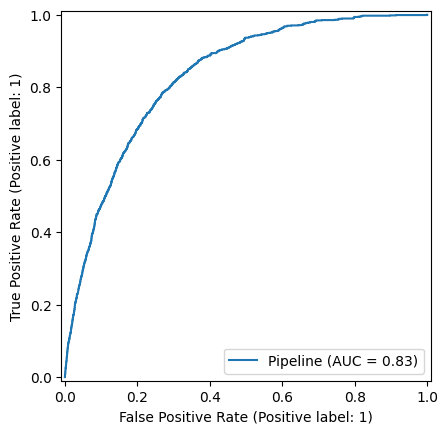

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=3,
    random_state=42,
    n_jobs=-1,
    objective="binary:logistic"
)

xgb_pipe = make_pipeline(preprocess_pipeline, xgb)

# Train
xgb_pipe.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_pipe.predict(X_test)

print("=== XGBoost ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_xgb):.3f}")
print(classification_report(y_test, y_pred_xgb, digits=3))

# ROC curve
RocCurveDisplay.from_estimator(xgb_pipe, X_test, y_test)
plt.show()


In [ ]:
param_dist_xgb = {
    "xgbclassifier__n_estimators": randint(200, 601),          # 200–600 trees
    "xgbclassifier__max_depth": randint(3, 9),                 # depth 3–8
    "xgbclassifier__learning_rate": uniform(0.01, 0.19),       # 0.01–0.20
    "xgbclassifier__subsample": uniform(0.6, 0.4),             # 0.6–1.0
    "xgbclassifier__colsample_bytree": uniform(0.6, 0.4),      # 0.6–1.0
    "xgbclassifier__min_child_weight": randint(1, 11),         # 1–10
    "xgbclassifier__gamma": uniform(0, 5),                     # 0–5
}

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist_xgb,
    n_iter=30,
    scoring="recall",   # maximize recall
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_random_search.fit(X_train, y_train)

print("Best CV recall:", xgb_random_search.best_score_)
print("Best params:", xgb_random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best CV recall: 0.20103156093454594
Best params: {'xgbclassifier__colsample_bytree': np.float64(0.8170784332632994), 'xgbclassifier__gamma': np.float64(0.7046211248738132), 'xgbclassifier__learning_rate': np.float64(0.16241742634326756), 'xgbclassifier__max_depth': 3, 'xgbclassifier__min_child_weight': 9, 'xgbclassifier__n_estimators': 526, 'xgbclassifier__subsample': np.float64(0.7693605922825478)}


####XGBoost — Summary

Despite being powerful in many machine-learning tasks, XGBoost performs poorly here—the recall remains low even after parameter tuning, indicating that boosting does not extract strong incremental signal from categorical lifestyle data. While the model excels at capturing complex nonlinear interactions when continuous clinical measures exist, the one-hot-encoded patterns used in this project offer limited structured gradients for boosting to exploit. This suggests XGBoost would likely improve only if richer numeric medical indicators or temporal health traces were included.

## **V. Ensemble Modeling**

### **5.1 Voting using our best models**

=== VotingClassifier (Soft Voting) ===
Accuracy: 0.720
Balanced accuracy: 0.737
              precision    recall  f1-score   support

           0      0.980     0.718     0.829     18847
           1      0.141     0.757     0.238      1153

    accuracy                          0.720     20000
   macro avg      0.560     0.737     0.533     20000
weighted avg      0.931     0.720     0.794     20000

Recall score for Voting Classifier: 0.757


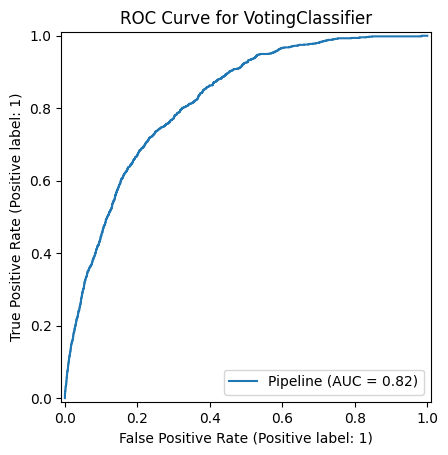

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt

# Helper to get the classifier from the best pipeline
def get_classifier_from_best_pipe(best_pipeline):
    return best_pipeline.named_steps[best_pipeline.steps[-1][0]]

# Get the best individual estimators from previous randomized searches
best_lr_model = get_classifier_from_best_pipe(rand_search.best_estimator_)
best_dt_model = get_classifier_from_best_pipe(dt_random_search.best_estimator_)
best_rf_model = get_classifier_from_best_pipe(rf_random_search.best_estimator_)
best_xgb_model = get_classifier_from_best_pipe(xgb_random_search.best_estimator_)

# Create the VotingClassifier with the best individual models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_lr_model),
        ('dt', best_dt_model),
        ('rf', best_rf_model),
        ('xgb', best_xgb_model)
    ],
    voting='soft',  # Use 'soft' voting for probability-based prediction
    weights=[0.33, 0.33, 0.33, 0.01], # Equal weights, can be tuned
    n_jobs=-1, # Use all available cores
    flatten_transform=False # Important for pipelines with ColumnTransformer
)

# Create the full pipeline with preprocessing and the VotingClassifier
voting_pipe = make_pipeline(preprocess_pipeline, voting_clf)

# Fit the voting pipeline
voting_pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred_vote = voting_pipe.predict(X_test)

print("=== VotingClassifier (Soft Voting) ===")
print(f'Accuracy: {accuracy_score(y_test, y_pred_vote):.3f}')
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_vote):.3f}')
print(classification_report(y_test, y_pred_vote, digits=3))

report_voting = classification_report(y_test, y_pred_vote, digits=3, output_dict=True)
recall_score_voting = report_voting['1']['recall']
print(f"Recall score for Voting Classifier: {recall_score_voting:.3f}")

# Plot ROC Curve
RocCurveDisplay.from_estimator(voting_pipe, X_test, y_test)
plt.title('ROC Curve for VotingClassifier')
plt.show()

### **5.2 Stacking using our best models**

=== StackingClassifier ===
Accuracy: 0.741
Balanced accuracy: 0.759
              precision    recall  f1-score   support

           0      0.982     0.738     0.843     18847
           1      0.154     0.779     0.257      1153

    accuracy                          0.741     20000
   macro avg      0.568     0.759     0.550     20000
weighted avg      0.934     0.741     0.809     20000

Recall score for Stacking Classifier: 0.779


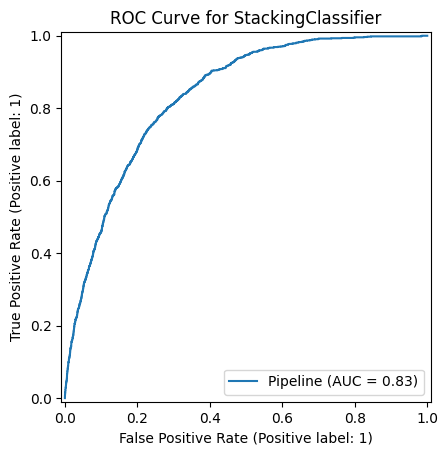

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt

# Helper function to get the classifier from the best pipeline (already defined in previous step)
def get_classifier_from_best_pipe(best_pipeline):
    return best_pipeline.named_steps[best_pipeline.steps[-1][0]]

# Get the best individual estimators
best_lr_model = get_classifier_from_best_pipe(rand_search.best_estimator_)
best_dt_model = get_classifier_from_best_pipe(dt_random_search.best_estimator_)
best_rf_model = get_classifier_from_best_pipe(rf_random_search.best_estimator_)
best_xgb_model = get_classifier_from_best_pipe(xgb_random_search.best_estimator_)

# Define base estimators for StackingClassifier
estimators = [
    ('lr', best_lr_model),
    ('dt', best_dt_model),
    ('rf', best_rf_model),
    ('xgb', best_xgb_model)
]

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42), # Use LogisticRegression as final estimator
    cv=5, # number of cross-validation folds for base estimators
    n_jobs=-1
)

# Create the full pipeline with preprocessing and the StackingClassifier
stacking_pipe = make_pipeline(preprocess_pipeline, stacking_clf)

# Fit the stacking pipeline
stacking_pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacking_pipe.predict(X_test)

print("=== StackingClassifier ===")
print(f'Accuracy: {accuracy_score(y_test, y_pred_stack):.3f}')
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_stack):.3f}')
print(classification_report(y_test, y_pred_stack, digits=3))

report_stacking = classification_report(y_test, y_pred_stack, digits=3, output_dict=True)
recall_score_stacking = report_stacking['1']['recall']
print(f"Recall score for Stacking Classifier: {recall_score_stacking:.3f}")

# Plot ROC Curve
RocCurveDisplay.from_estimator(stacking_pipe, X_test, y_test)
plt.title('ROC Curve for StackingClassifier')
plt.show()

## **VI. Conclusion**


###**6.1 Primary Findings and Model Outcomes**

Using lifestyle and demographic data from BRFSS, we successfully predicted heart-disease risk without relying on clinical measurements. Among all models, Decision Tree and Random Forest delivered the highest performance, achieving recall values around 0.77–0.79, far outperforming KNN and XGBoost.

These tree-based models excel because they naturally capture nonlinear patterns, threshold effects, and interactions in categorical survey data, while class-weight balancing allows them to better identify the minority positive class. Random Forest improves stability through ensemble averaging, while Decision Tree remains highly interpretable with comparable recall.

Overall, our findings show that behavioral and demographic information alone can meaningfully detect high-risk individuals, demonstrating the value of low-cost, survey-based early-risk prediction for public-health applications.

### **6.2 Future Development**

To overcome these constraints, future work should expand beyond binary lifestyle indicators and capture richer behavioral depth — not just whether someone smokes or exercises, but how intensely, how consistently, and for how long. Variables such as pack-year smoking exposure, sleep regularity metrics, and validated diet quality indices could uncover gradations of risk currently invisible to the model. Additionally, psychological and social context is likely a key mediator between lifestyle and disease progression; mental-health–linked measures such as stress burden, depressive symptoms, loneliness, and social support could introduce a missing dimension of risk. Beyond the individual, cardiovascular health is shaped by environment: air quality, green-space access, food environment, and walkability all influence long-term behavior and inflammation. Integrating environmental and contextual indicators may allow us to build models that better reflect real-world health determinants, ultimately improving recall–precision balance and strengthening the credibility of predictions in preventive medicine.

### **6.3 Model's Inability**

Despite achieving a stable AUC of approximately 0.83 across multiple algorithms, the predictive ceiling remains difficult to break. Even when we introduce more advanced methods such as Voting and Stacking, performance does not meaningfully exceed Logistic Regression, suggesting that additional algorithmic complexity does not unlock new signal in the current dataset. This also implies that the underlying behavioral variables may carry limited non-linear structure, restricting the room for incremental predictive gain. Furthermore, model interpretability remains a critical drawback — while logistic regression provides coefficients, its explanatory power weakens once interactions and encoded variables multiply, reducing clinical trust and decision transparency. When we increase recall to capture more potential at-risk individuals, false positives rise simultaneously, pushing precision downward and making threshold-setting clinically sensitive. Overall, the plateaued performance indicates that behavioral data alone may not fully capture the physiological mechanisms of cardiovascular disease, which caps the model’s ultimate diagnostic reliability.



## **VII. AI disclosure**
Brainstorming & Topic Validation:
We consulted ChatGPT during the early stages of the project to evaluate the feasibility of several research ideas. The tool helped us assess whether certain BRFSS variables could meaningfully support our intended research questions.
Code Debugging & Error Resolution:
ChatGPT was used to help identify and correct issues in Python preprocessing code, model pipelines, and syntax errors. All final code was reviewed, modified, and verified by our team to ensure correctness and understanding.
Writing Support :
We used ChatGPT to improve the clarity, grammar, and readability of written sections.
All AI-generated suggestions were carefully evaluated, edited, and validated by our team to ensure factual accuracy and full alignment with our own analytical work.